In [1]:
from itertools import groupby

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("coffee_survey.csv")

In [3]:
plt.style.use("Solarize_Light2")

colors = [
    "#72512d",
    "#805b33",
    "#92673a",
    "#a47441",
    "#b68149",
    "#be8e5b",
    "#c59a6d",
    "#cca77f",
    "#d3b492",
    "#dbc0a4",
    "#e2cdb6",
    "#e9d9c8"
]

In [4]:
df.shape

(4042, 113)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 113 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(92)
memory usage: 3.5+ MB


In [6]:
list(df.columns)

['Submission ID',
 'What is your age?',
 'How many cups of coffee do you typically drink per day?',
 'Where do you typically drink coffee?',
 'Where do you typically drink coffee? (At home)',
 'Where do you typically drink coffee? (At the office)',
 'Where do you typically drink coffee? (On the go)',
 'Where do you typically drink coffee? (At a cafe)',
 'Where do you typically drink coffee? (None of these)',
 'How do you brew coffee at home?',
 'How do you brew coffee at home? (Pour over)',
 'How do you brew coffee at home? (French press)',
 'How do you brew coffee at home? (Espresso)',
 'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
 'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
 'How do you brew coffee at home? (Instant coffee)',
 'How do you brew coffee at home? (Bean-to-cup machine)',
 'How do you brew coffee at home? (Cold brew)',
 'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))',
 'How do you brew

In [7]:
df["What is your age?"].unique()

array(['18-24 years old', '25-34 years old', '35-44 years old',
       '55-64 years old', nan, '<18 years old', '>65 years old',
       '45-54 years old'], dtype=object)

In [8]:
df["What is your age?"].value_counts()

What is your age?
25-34 years old    1986
35-44 years old     960
18-24 years old     461
45-54 years old     302
55-64 years old     187
>65 years old        95
<18 years old        20
Name: count, dtype: int64

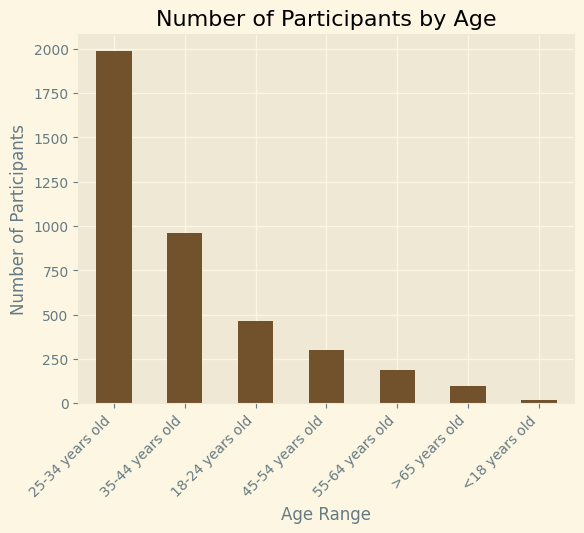

In [9]:
age_col_value_counts = (df["What is your age?"].value_counts())

age_col_value_counts.plot(kind="bar", color="#72512d")

plt.title("Number of Participants by Age")
plt.xlabel("Age Range")
plt.ylabel("Number of Participants")

plt.xticks(rotation=45, ha='right')
plt.grid(True)

# plt.savefig("age.png")

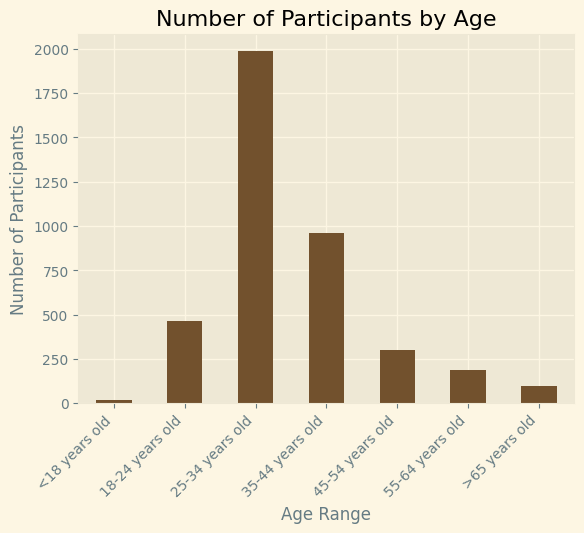

In [10]:
age_col_value_counts = (df["What is your age?"].value_counts())
age_cols_ordered = age_col_value_counts[
    [
        "<18 years old",
        "18-24 years old",
        "25-34 years old",
        "35-44 years old",
        "45-54 years old",
        "55-64 years old",
        ">65 years old"
    ]
]

age_cols_ordered.plot(kind="bar", color="#72512d")

plt.title("Number of Participants by Age")
plt.xlabel("Age Range")
plt.ylabel("Number of Participants")

plt.xticks(rotation=45, ha='right')
plt.grid(True)

# plt.savefig("age.png")

In [11]:
df["What is your favorite coffee drink?"].unique()

array(['Regular drip coffee', 'Iced coffee', 'Latte', 'Pourover', nan,
       'Other', 'Cortado', 'Cappuccino', 'Espresso', 'Cold brew',
       'Americano', 'Mocha', 'Blended drink (e.g. Frappuccino)'],
      dtype=object)

In [12]:
df["What is your favorite coffee drink?"].value_counts()

What is your favorite coffee drink?
Pourover                            1084
Latte                                680
Regular drip coffee                  442
Cappuccino                           341
Espresso                             330
Cortado                              312
Americano                            249
Iced coffee                          156
Mocha                                118
Other                                114
Cold brew                            109
Blended drink (e.g. Frappuccino)      45
Name: count, dtype: int64

Text(0.5, 1.0, 'Preferred Coffee Drink Type (All Ages)')

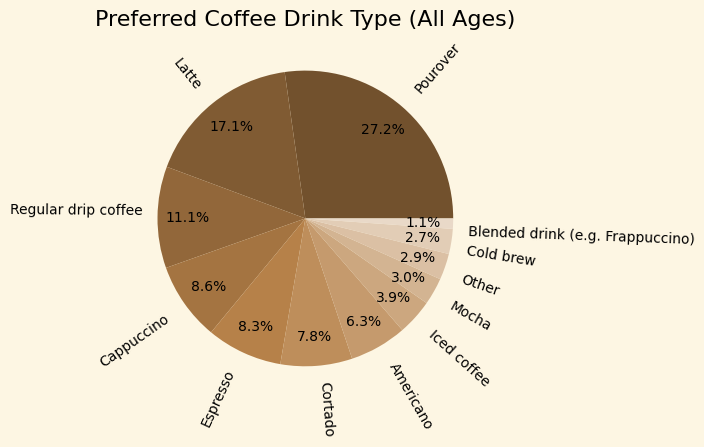

In [13]:
coffee_pref_counts_all = (df["What is your favorite coffee drink?"].value_counts())

plt.pie(coffee_pref_counts_all,
        labels=coffee_pref_counts_all.index,
        rotatelabels=True,
        autopct="%1.1f%%",
        pctdistance=.8,
        colors=colors)

plt.title("Preferred Coffee Drink Type (All Ages)")

# plt.savefig("age.png")

In [14]:
age_group = df.groupby("What is your age?")

In [15]:
age_group.get_group("25-34 years old")["What is your favorite coffee drink?"].value_counts()

What is your favorite coffee drink?
Pourover                            566
Latte                               347
Regular drip coffee                 196
Cortado                             172
Cappuccino                          168
Espresso                            158
Americano                           111
Iced coffee                          82
Cold brew                            56
Mocha                                51
Other                                50
Blended drink (e.g. Frappuccino)     14
Name: count, dtype: int64

Text(0.5, 1.0, 'Preferred Coffee Drink Type (Ages 25–34)')

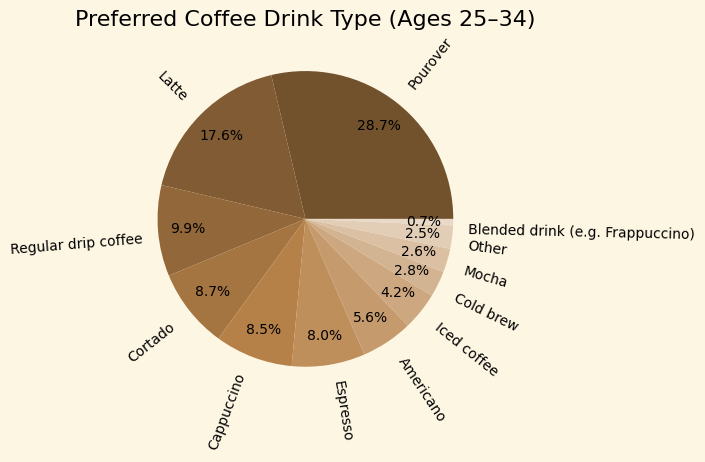

In [16]:
coffee_pref_counts_25 = age_group.get_group("25-34 years old")["What is your favorite coffee drink?"].value_counts()

plt.pie(coffee_pref_counts_25,
        labels=coffee_pref_counts_25.index,
        rotatelabels=True,
        autopct="%1.1f%%",
        pctdistance=.8,
        colors=colors)

plt.title("Preferred Coffee Drink Type (Ages 25–34)")

# plt.savefig("age.png")

In [17]:
age_group.get_group("55-64 years old")["What is your favorite coffee drink?"].value_counts()

What is your favorite coffee drink?
Regular drip coffee                 40
Pourover                            38
Latte                               32
Cappuccino                          17
Espresso                            13
Americano                           10
Other                               10
Cortado                              8
Iced coffee                          6
Mocha                                6
Cold brew                            3
Blended drink (e.g. Frappuccino)     1
Name: count, dtype: int64

Text(0.5, 1.1, 'Preferred Coffee Drink Type (Ages 55–64)')

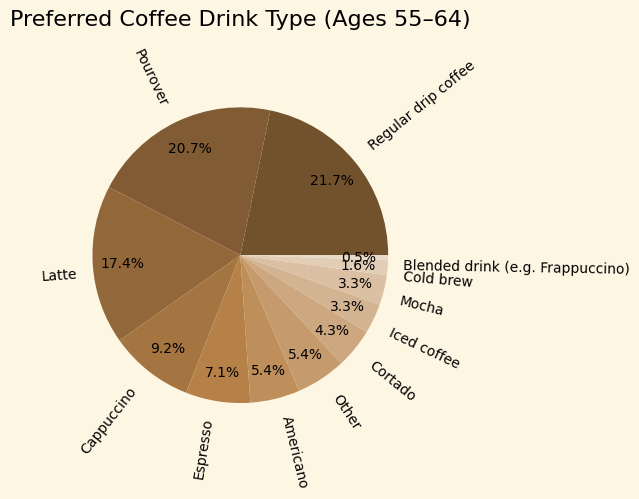

In [18]:
coffee_pref_counts_55 = age_group.get_group("55-64 years old")["What is your favorite coffee drink?"].value_counts()

plt.pie(coffee_pref_counts_55,
        labels=coffee_pref_counts_55.index,
        rotatelabels=True,
        autopct="%1.1f%%",
        pctdistance=.8,
        colors=colors)

plt.title("Preferred Coffee Drink Type (Ages 55–64)", y=1.1)

# plt.savefig("age.png")

In [19]:
df["How many cups of coffee do you typically drink per day?"].value_counts()

How many cups of coffee do you typically drink per day?
2              1663
1              1277
3               473
Less than 1     348
4               121
More than 4      67
Name: count, dtype: int64

Text(0.5, 1.0, 'Cups of Coffee per Day (All Ages)')

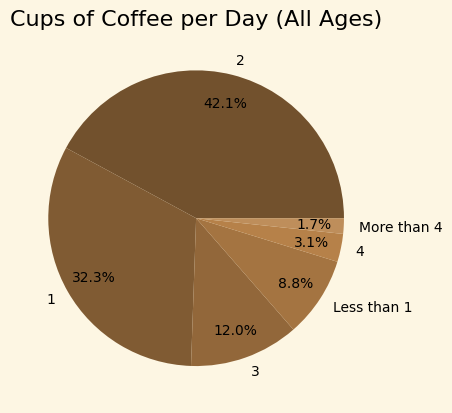

In [20]:
cups_all = (df["How many cups of coffee do you typically drink per day?"].value_counts())

plt.pie(cups_all,
        labels=cups_all.index,
        autopct="%1.1f%%",
        pctdistance=.8,
        colors=colors)

plt.title("Cups of Coffee per Day (All Ages)")

# plt.savefig("age.png")

In [21]:
age_group.get_group("25-34 years old")["How many cups of coffee do you typically drink per day?"].value_counts()

How many cups of coffee do you typically drink per day?
2              828
1              689
3              206
Less than 1    176
4               39
More than 4     18
Name: count, dtype: int64

Text(0.5, 1.0, 'Cups of Coffee per Day (Ages 25–34)')

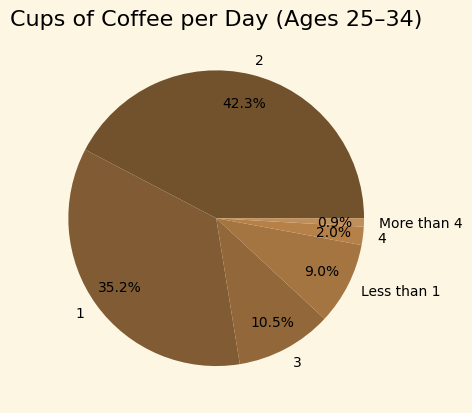

In [22]:
cups_25 = age_group.get_group("25-34 years old")["How many cups of coffee do you typically drink per day?"].value_counts()

plt.pie(cups_25,
        labels=cups_25.index,
        autopct="%1.1f%%",
        pctdistance=.8,
        colors=colors)

plt.title("Cups of Coffee per Day (Ages 25–34)")

# plt.savefig("age.png")

In [23]:
age_group.get_group("55-64 years old")["How many cups of coffee do you typically drink per day?"].value_counts()

How many cups of coffee do you typically drink per day?
2              78
3              38
1              36
4              15
Less than 1     9
More than 4     6
Name: count, dtype: int64

Text(0.5, 1.0, 'Cups of Coffee per Day (Ages 55–64)')

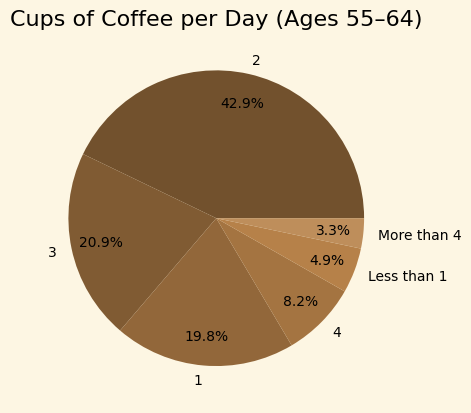

In [24]:
cups_55 = age_group.get_group("55-64 years old")["How many cups of coffee do you typically drink per day?"].value_counts()

plt.pie(cups_55,
        labels=cups_55.index,
        autopct="%1.1f%%",
        pctdistance=.8,
        colors=colors)

plt.title("Cups of Coffee per Day (Ages 55–64)")

# plt.savefig("age.png")

In [25]:
df["In total, much money do you typically spend on coffee in a month?"].value_counts()

In total, much money do you typically spend on coffee in a month?
$20-$40     1293
$40-$60     1050
<$20         427
$60-$80      387
$80-$100     223
>$100        131
Name: count, dtype: int64

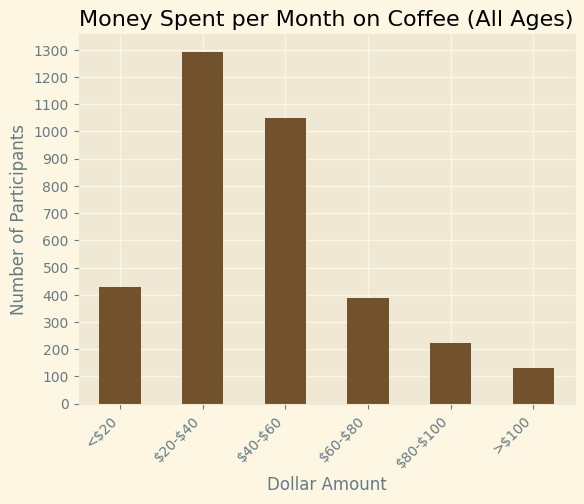

In [35]:
money_col_value_counts = (
    df["In total, much money do you typically spend on coffee in a month?"]
    .value_counts()
)

money_cols_ordered = money_col_value_counts[
    [
        "<$20",
        "$20-$40",
        "$40-$60",
        "$60-$80",
        "$80-$100",
        ">$100"
    ]
]

money_cols_ordered.plot(kind="bar", color="#72512d")

plt.title("Money Spent per Month on Coffee (All Ages)")
plt.xlabel("Dollar Amount")
plt.ylabel("Number of Participants")

x_labels = [
    "<$20",
    "\$20-\$40",
    "\$40-\$60",
    "\$60-\$80",
    "\$80-\$100",
    ">$100"
]
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=x_labels,
           rotation=45, ha='right')
plt.yticks(np.arange(0, 1400, 100)) 
plt.grid(True)

# plt.savefig("age.png")